<a href="https://colab.research.google.com/github/rnignon/DAP/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19에 따른 온라인을 통한 소비 통계
2019년 12월에 처음 발생한 코로나 바이러스는 현재 우리의 생활에 큰 영향을 미쳤다.

감염 질환인 코로나 바이러스를 예방하기 위해 학생들의 수업은 온라인으로 전환되었고, 모임을 자제하도록 하였다.  

이러한 변화에 따른 사람들의 **온라인을 통한 소비**에 대한 데이터를 분석한다.


---

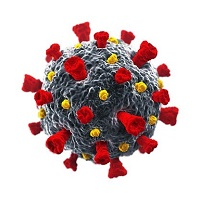

In [2]:
from dateutil.parser import parse
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime as dt

# 데이터 불러오기
covid = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/covid19.csv')
food = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/naver_datalab_shoppingInsight_category_food.csv')
clothes = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/naver_datalab_shoppingInsight_category_clothes.csv')
onlineShopping = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/onlineShopping.csv')

In [3]:
covidDf = pd.DataFrame(data = covid.confirmed.array, index = covid.date, columns = ['confirmed'])
covidDf = covidDf.replace(',', '', regex = True)
covidDf['confirmed'] = pd.to_numeric(covidDf['confirmed'])

xdates = [dt.strptime(dstr, '%Y-%m-%d') for dstr in covidDf.index]

covidDf

,confirmed
date,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1
...,...
2021-12-13,5817
2021-12-14,5567
2021-12-15,7850


# COVID-19 확진자 추이

2020년 11월 이후, 2021년 7월 이후를 기준으로 확진자 그래프가 상승함을 볼 수 있다.

2020년 11월 이후 많아진 확진자의 수는 2020년 12월 말, 다시 감소하기 시작하였다.

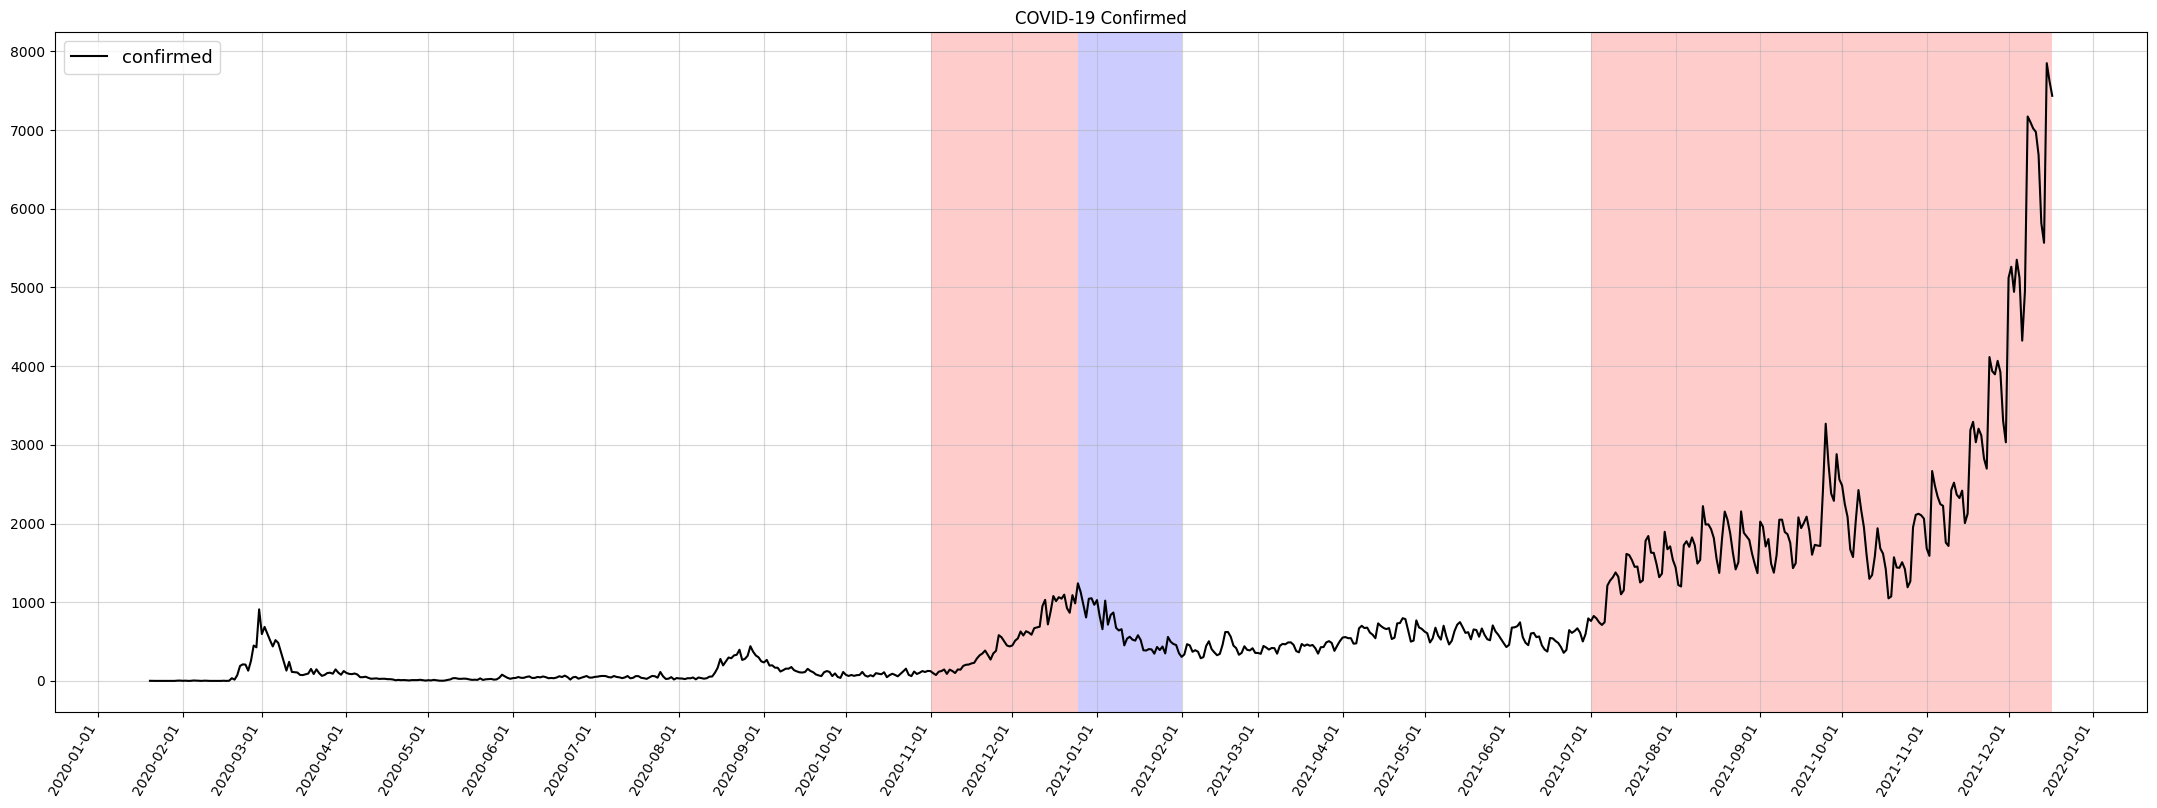

In [4]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("COVID-19 Confirmed")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.plot(xdates, covidDf['confirmed'], "-", color = 'black', label = 'confirmed')

plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.grid(alpha=0.5)
plt.axvspan(dt(2020, 11, 1), dt(2020,12,25), facecolor='red', alpha=0.2)
plt.axvspan(dt(2021, 7, 1), dt(2021,12,17), facecolor='red', alpha=0.2)
plt.axvspan(dt(2020, 12, 25), dt(2021,2,1), facecolor='blue', alpha=0.2)
plt.legend(fontsize = 13)
plt.show()

# COVID-19 사망자 추이
확진자 수가 상승하면, 며칠 뒤 사망자의 수가 따라 증가한다는 것을 볼 수 있다.

확진자 수와 사망자 수의 동향은 비슷하다.

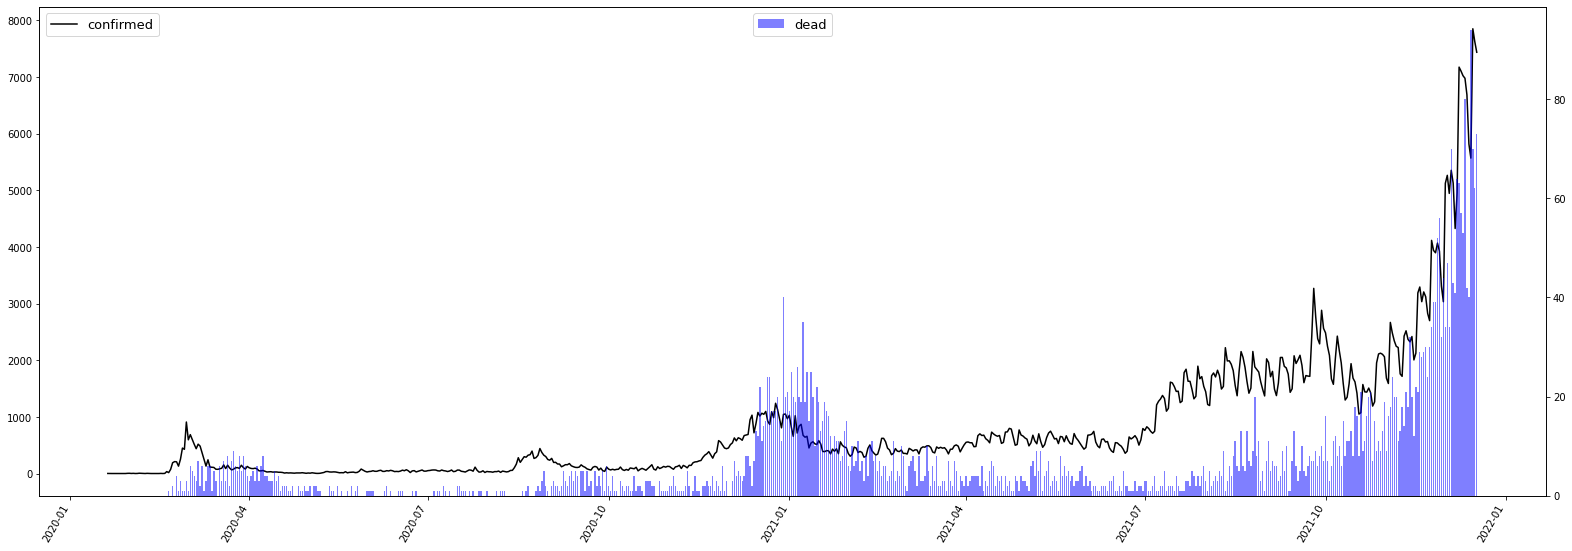

In [7]:
deadDf = pd.DataFrame(data = covid.dead.array, index = covid.date, columns = ['dead'])
deadDf = deadDf.replace(',', '', regex = True)
deadDf = deadDf.replace('-', '', regex = True)
deadDf['dead'] = pd.to_numeric(deadDf['dead'])
deadX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in deadDf.index]

fig, ax1 = plt.subplots()

plt.rcParams['figure.figsize'] = (27, 9)

ax1.plot(xdates, covidDf['confirmed'], "-", color = 'black', label = 'confirmed')

plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.legend(fontsize = 13)

ax2 = ax1.twinx()

ax2.bar(xdates, deadDf['dead'], color = 'blue', label = 'dead' , alpha = 0.5, width = 0.7)

plt.legend(fontsize = 13)
plt.show()

# 사회적 거리두기 실시
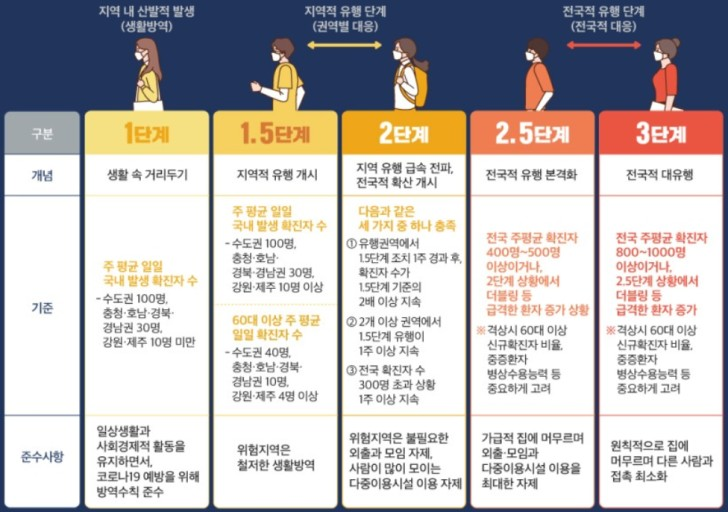



**2020년**
- 3월 22일, 15일간 강도 높은 사회적 거리두기 대책 발표
- 5월 6일, '생활 속 거리두기' 생활 방역 시작
- 8월 16일, 수도권 거리두기 2단계 격상
- 8월 23일, 전국적 거리두기 2단계 격상
- 8월 30일, 더욱 강화된 거리두기 2.5단계 실시
- 9월 14일, 거리두기 2단계로 하향
- 10월 12일, 거리두기 1단계로 하향
- 11월 24일, 거리두기 2단계 격상
- 12월 8일, 수도권 거리두기 2.5단계로 격상

**2021년**
- 1월 2일, 5인 이상 집합 금지 전국적 확대
- 2월 15일, 비수도권 1.5단계, 수도권 2단계로 하향
- 7월 12일, 거리두기 4단계로 적용 (경기, 인천의 모든 유치원, 초, 중, 고 전면 원격 수업 전환. 서울은 14일부터 적용)
- 7월 14일, 전국적 거리두기 2단계로 격상
.
.
.



# 거리두기 적용 기간 내 확진자 추이
빨간색 영역은 거리두기 단계를 격상시킨 후, 다시 하향시키기까지의 기간이다.


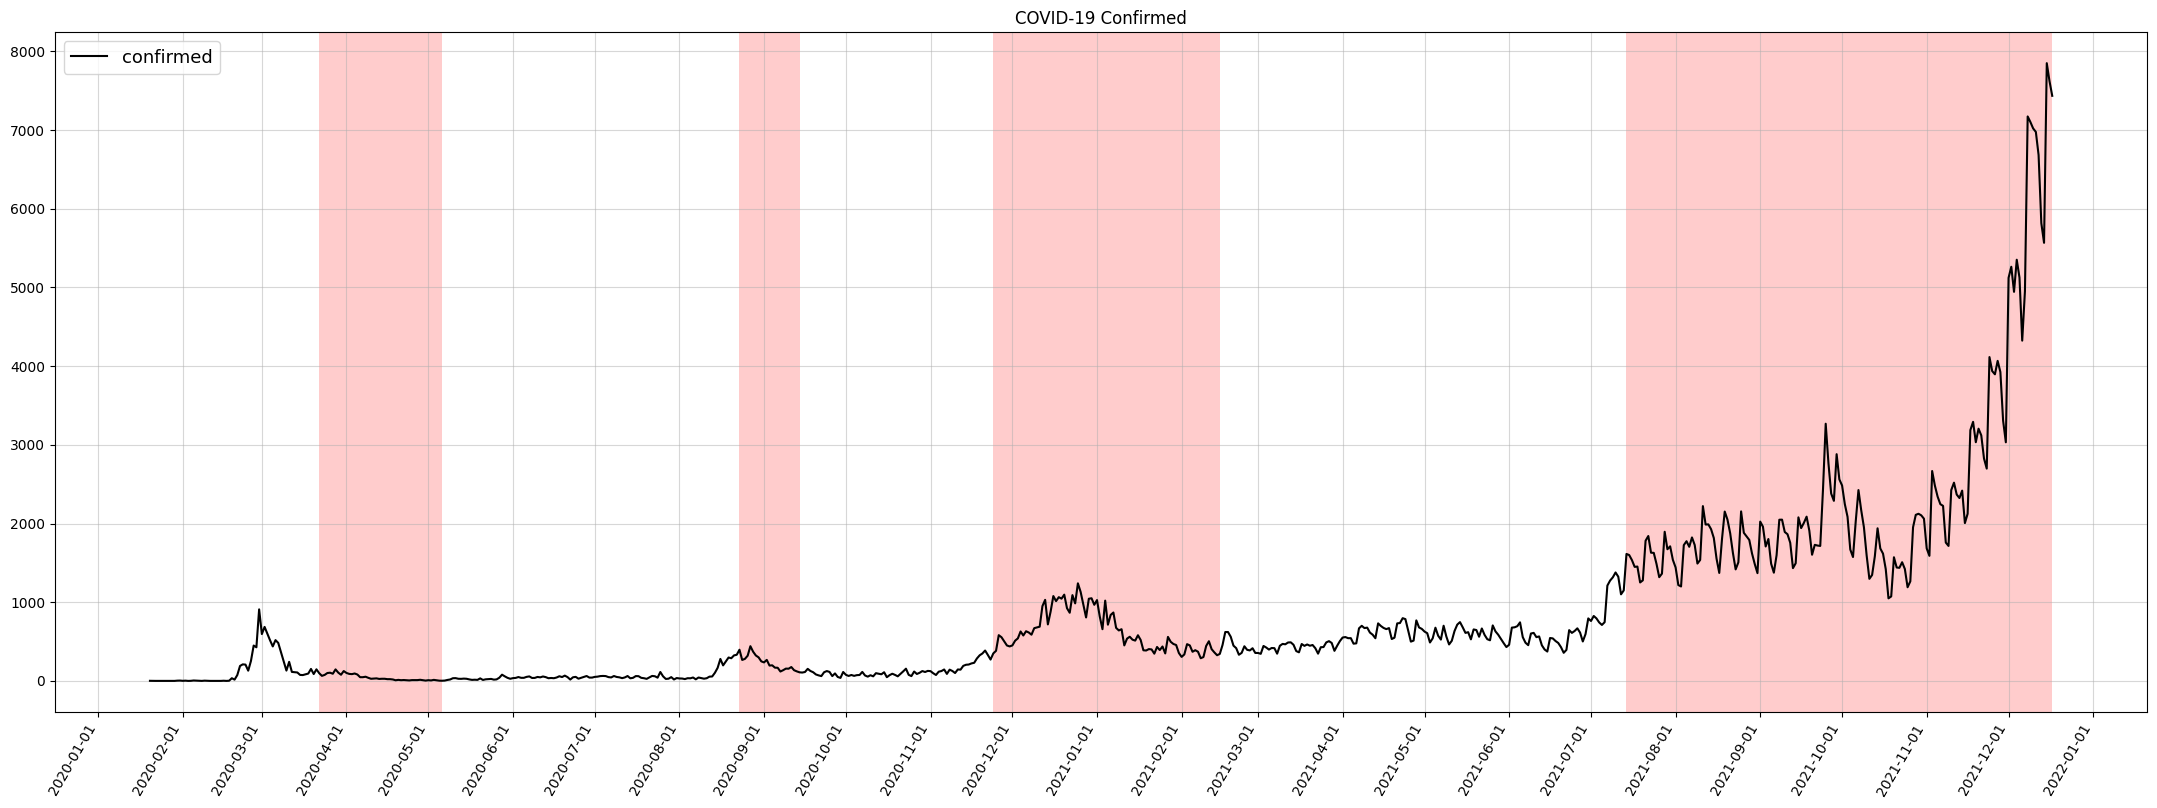

In [6]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("COVID-19 Confirmed")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.plot(xdates, covidDf['confirmed'], "-", color = 'black', label = 'confirmed')

plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.grid(alpha=0.5)
plt.axvspan(dt(2020, 3, 22), dt(2020,5,6), facecolor='red', alpha=0.2)
plt.axvspan(dt(2020, 8, 23), dt(2020,9,14), facecolor='red', alpha=0.2)
plt.axvspan(dt(2020, 11, 24), dt(2021,2,15), facecolor='red', alpha=0.2)
plt.axvspan(dt(2021, 7, 14), dt(2021,12,17), facecolor='red', alpha=0.2)
plt.legend(fontsize = 13)
plt.show()

In [8]:
clothesDf = pd.DataFrame(data = clothes.PRODUCT.array, index = clothes.DATE, columns = ['PRODUCT'])
foodDf = pd.DataFrame(data = food.PRODUCT.array, index = food.DATE, columns = ['PRODUCT'])

clothesX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in clothesDf.index]
foodX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in foodDf.index]

# 네이버 쇼핑 인사이트 - 패션의류
클릭이 발생한 검색어의 클릭량 추이를 조사한다.

파란색 구분 선은 거리두기 단계를 격상하기 시작한 날짜이다.
3번째 구분선을 제외하고, 나머지 구분선에서는 거리두기 단계를 격상한 후 그래프가 상승하는 것을 볼 수 있다.

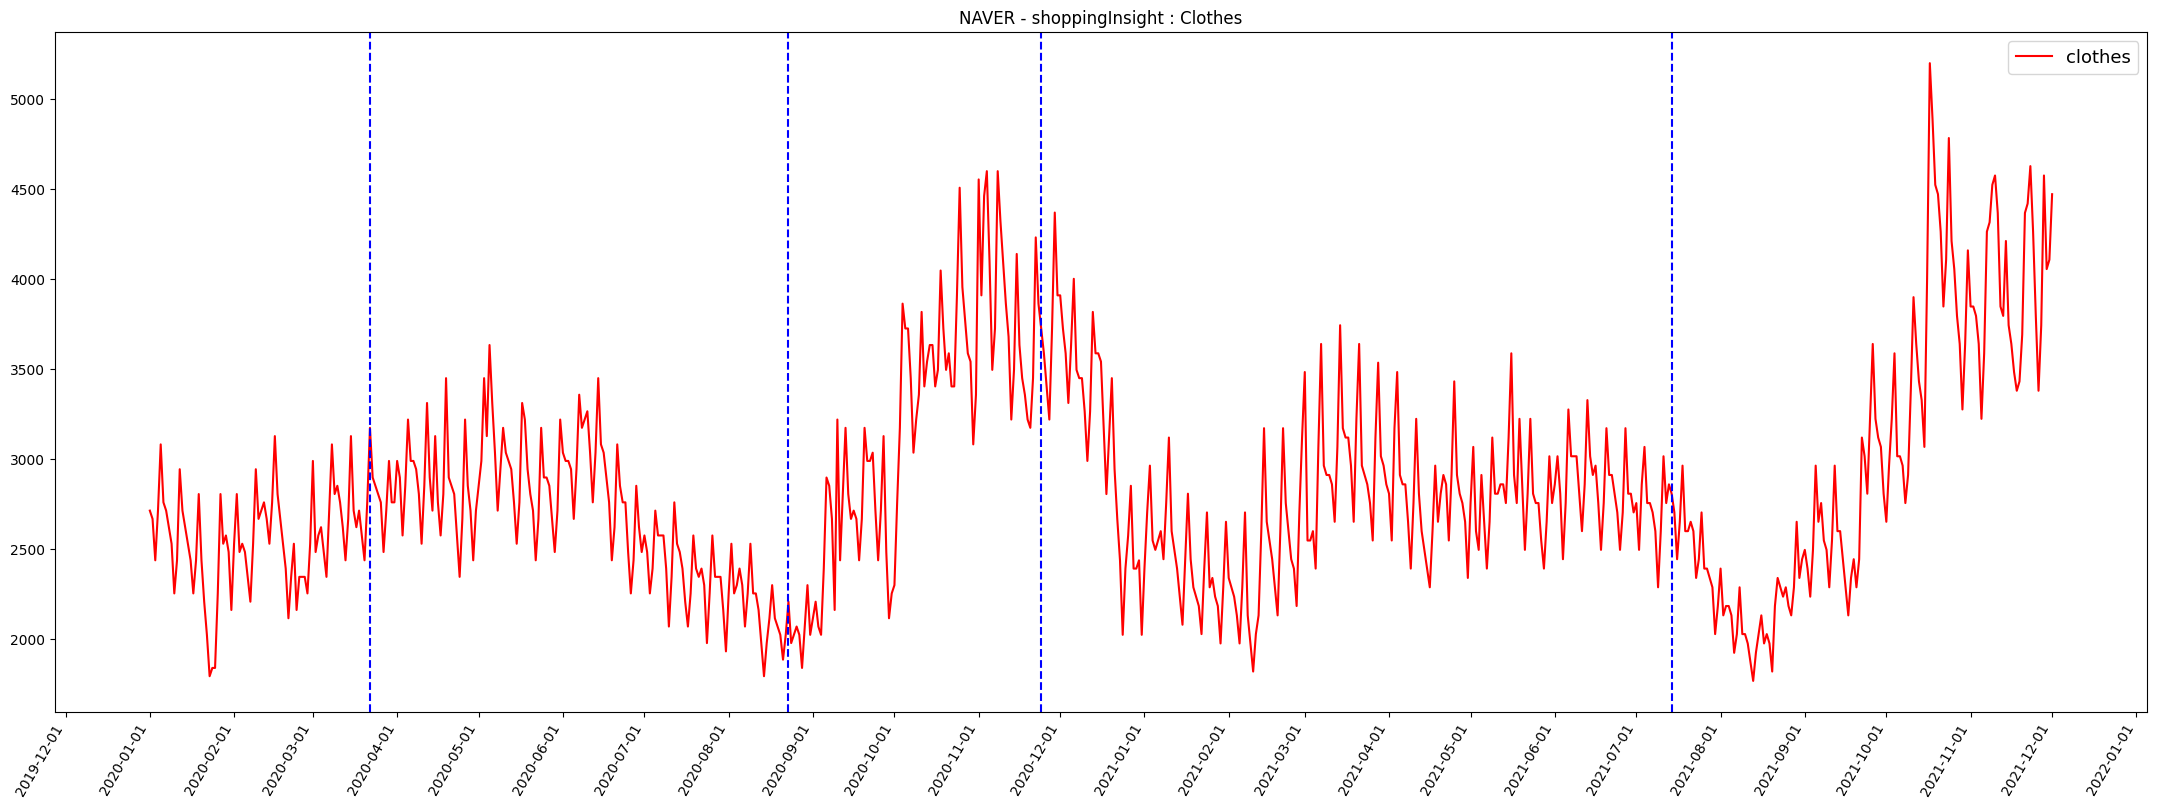

In [9]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("NAVER - shoppingInsight : Clothes")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.plot(clothesX, clothesDf['PRODUCT'], "-", color = 'red', label = 'clothes')
plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.axvline(x = dt(2020, 3, 22), color = 'blue', linestyle = '--')
plt.axvline(x = dt(2020, 8, 23), color = 'blue', linestyle = '--')
plt.axvline(x = dt(2020, 11, 24), color = 'blue', linestyle = '--')
plt.axvline(x = dt(2021, 7, 14), color = 'blue', linestyle = '--')
plt.legend(fontsize = 13)
plt.show()

# 네이버 쇼핑 인사이트 - 식품
클릭이 발생한 검색어의 클릭량 추이를 조사한다.

빨간색 구분 선은 거리두기 단계를 격상하기 시작한 날짜이다. 1번째 구분선을 제외하고, 나머지 구분선에서는 거리두기 단계를 격상한 후 그래프가 상승하는 것을 볼 수 있다.

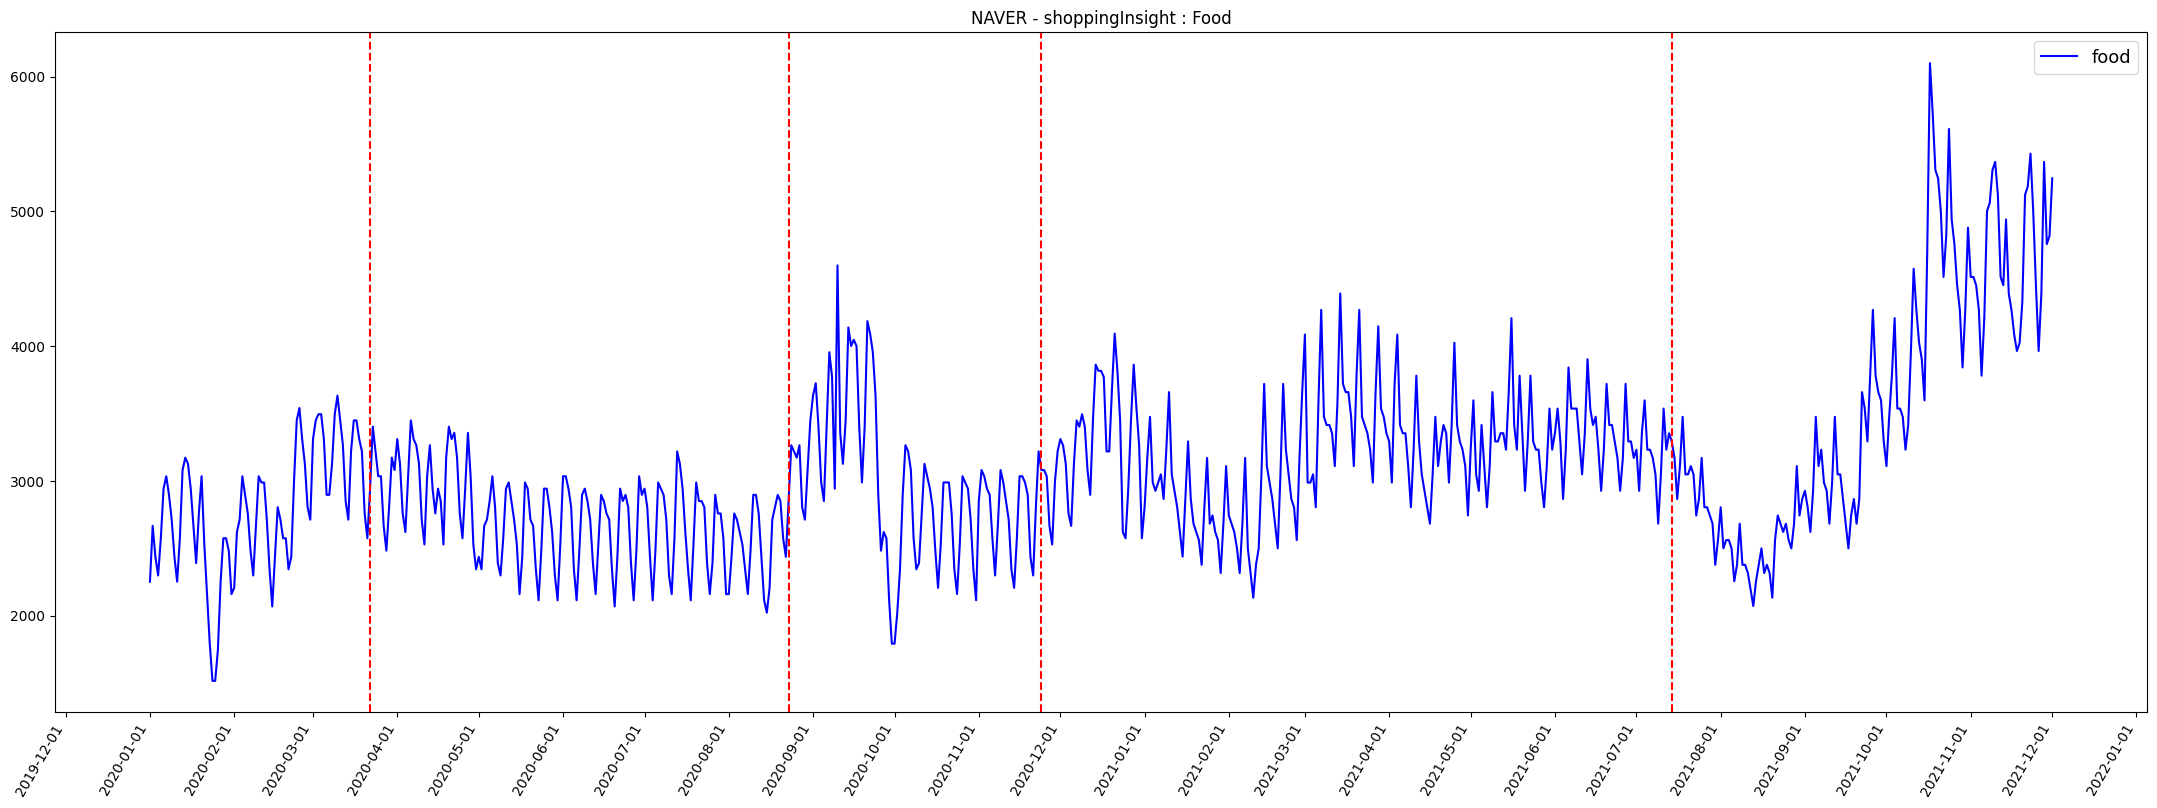

In [10]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("NAVER - shoppingInsight : Food")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.plot(foodX, foodDf['PRODUCT'], "-", color = 'blue', label = 'food')
plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.axvline(x = dt(2020, 3, 22), color = 'red', linestyle = '--')
plt.axvline(x = dt(2020, 8, 23), color = 'red', linestyle = '--')
plt.axvline(x = dt(2020, 11, 24), color = 'red', linestyle = '--')
plt.axvline(x = dt(2021, 7, 14), color = 'red', linestyle = '--')
plt.legend(fontsize = 13)
plt.show()

# 온라인 쇼핑 동향
온라인·모바일을 통한 쇼핑 추이를 분석한다. 통계청의 온라인 쇼핑 동향 데이터를 활용하였다.

파란색 선은 온라인을 통한 소비를 나타내며,
빨간색 선은 모바일을 통한 소비를 나타낸다.
해당 값들은 온라인 쇼핑의 거래액을 나타내며, 단위는 억원이다.

보라색 구분선은 거리두기 단계를 격상하기 시작한 날짜이다. 3번째 구분선을 제외하고 구분선을 기준으로 소비가 상승한 것으로 보였다.

구분선을 고려하지 않고 보았을 때, 전반적으로 계속 상승하는 동향을 보여준다.


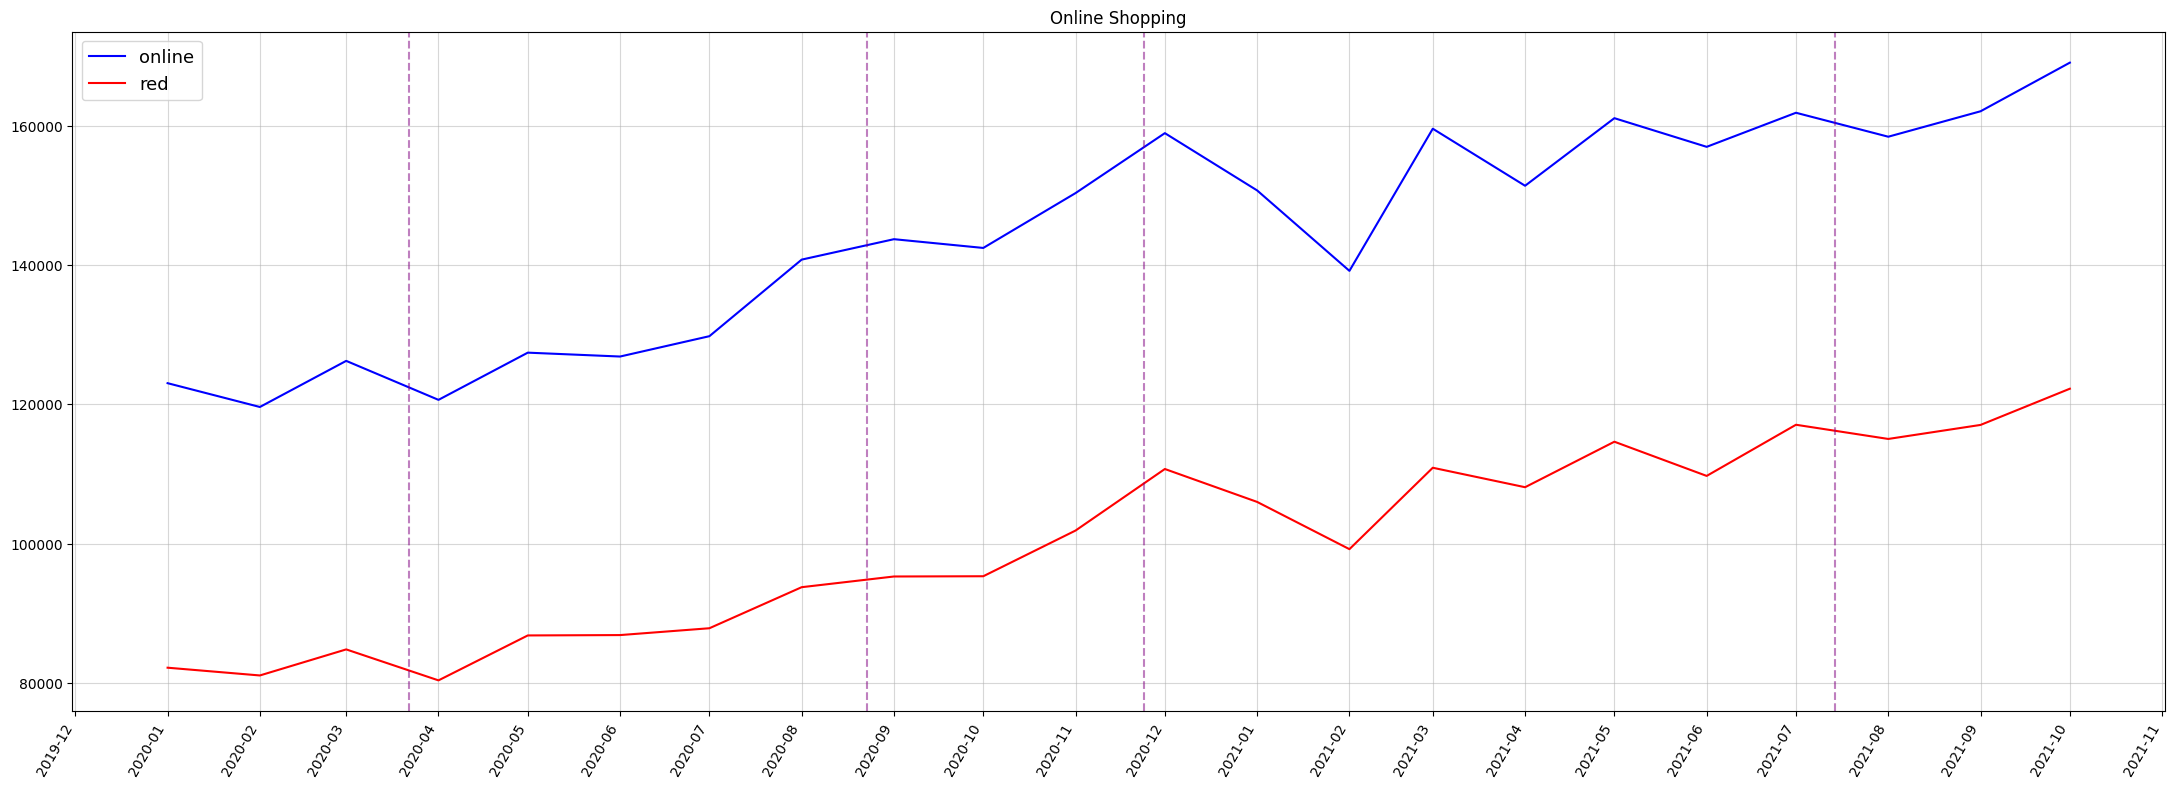

In [11]:
onlineDf = pd.DataFrame(data = onlineShopping.online.array, index = onlineShopping.date, columns = ['online'])
onlineX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in onlineDf.index]
mobileDf = pd.DataFrame(data = onlineShopping.mobile.array, index = onlineShopping.date, columns = ['mobile'])
mobileX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in mobileDf.index]

plt.figure(figsize = (27, 9), dpi = 100)
plt.title("Online Shopping")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.plot(onlineX, onlineDf['online'], "-", color = 'blue', label = 'online')
plt.plot(mobileX, mobileDf['mobile'], "-", color = 'red', label = 'red')
plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.grid(alpha=0.5)
plt.axvline(x = dt(2020, 3, 22), color = 'purple', linestyle = '--', alpha = 0.5)
plt.axvline(x = dt(2020, 8, 23), color = 'purple', linestyle = '--', alpha = 0.5)
plt.axvline(x = dt(2020, 11, 24), color = 'purple', linestyle = '--', alpha = 0.5)
plt.axvline(x = dt(2021, 7, 14), color = 'purple', linestyle = '--', alpha = 0.5)
plt.legend(fontsize = 13)
plt.show()

# 택배 물량·배달 이용의 분석
택배 물량의 데이터는 한국통합물류협회로부터 가져왔다.
택배 물량 값의 기준은 경제활동 인구 1인당 택배 이용 횟수의 평균을 나타낸다.

배달 이용의 데이터는 KOSIS의 '배달앱 및 배달대행 이용현황' 데이터를 이용한다.
배달 이용 값의 기준은 배달 대행에 이용되는 월평균 비용을 나타낸다.

한 그래프에 나타나기 위해 배달 이용 데이터를 가공해주었다. 따라서 파란색 바 그래프의 y축 값은 임의의 값이다.

택배·배달 이용량은 전반적으로 상승하지만, 2020년에 급격하게 상승됨을 볼 수 있다.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


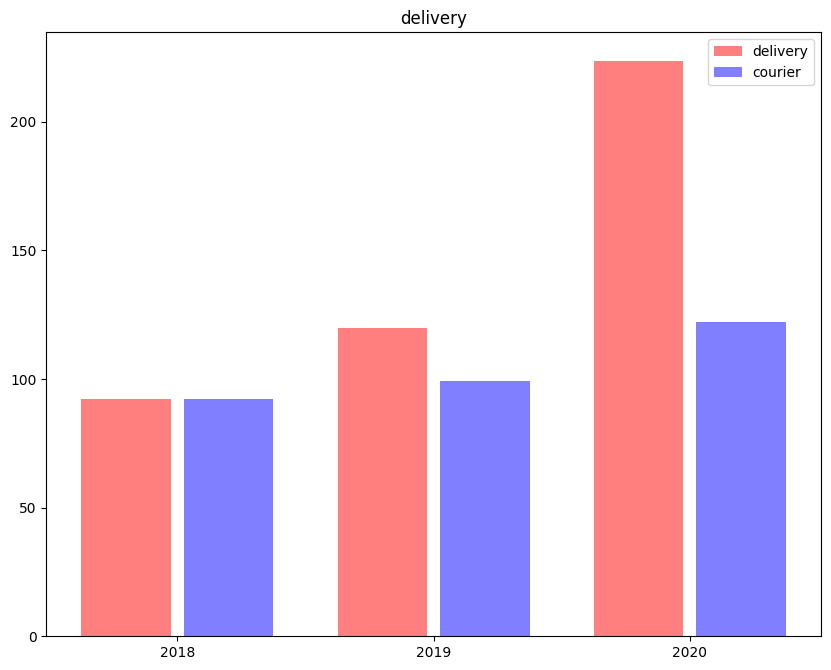

In [12]:
delivery = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/delivery.csv')

courier = pd.DataFrame({'Year' : [2018, 2019, 2020],
                       'count' : [92.2, 99.3, 122.0]})

# 코드 참조 : https://hleecaster.com/python-matplotlib-bar-graph/
topics = ['2018', '2019', '2020']

t = 2 # There are two sets of data: A and B
w = 0.8 # We generally want bars to be 0.8
n = 1 # A is first set of data
d = 3 # There are 5 topics we're plotting

deliveryX = [t*element + w*n for element in range(d)]
n = 2
t = 2
d = 3
w = 0.8
courierX = [t*element + w*n for element in range(d)]

delivery = delivery.replace(',', '', regex  =True)
delivery['sales'] = pd.to_numeric(delivery['sales'])/5098.839
delivery['Year'] = pd.to_numeric(delivery['Year'])

plt.figure(figsize = (10, 8), dpi = 100)
plt.title("delivery")

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)

ax = plt.subplot()
middle_x = [(deliveryX + courierX)/2 for (deliveryX, courierX) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

courier['Year'] = courier['Year']+0.5
plt.bar(deliveryX, delivery['sales'], color = 'red', label = 'delivery' , alpha = 0.5, width = 0.7)
plt.bar(courierX, courier['count'], color = 'blue', label = 'courier', alpha = 0.5, width = 0.7)
plt.legend()
plt.show()

In [13]:
# install packages
!pip install dash
!pip install jupyter_dash

     |████████████████████████████████| 7.3 MB 7.4 MB/s 
     |████████████████████████████████| 26.5 MB 2.1 MB/s 
     |████████████████████████████████| 357 kB 43.8 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=a3b8f41c7d7f557897b5b1d831982f72a8a36a52db445a843953b245d48c5919
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=d635544779f11cb249eb57a1e5bb56747e3f090742f87f595c7e114f3d4f32f2
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=3bfbc63fdd94f49a78e9e8f449a499fd040ef7a5a99ac946148f304d9aeb0681
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

In [14]:
clothesDf = pd.DataFrame(data = clothes.PRODUCT.array, index = clothes.DATE, columns = ['PRODUCT'])
foodDf = pd.DataFrame(data = food.PRODUCT.array, index = food.DATE, columns = ['PRODUCT'])

clothesX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in clothesDf.index]
foodX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in foodDf.index]

clothesDf = clothesDf[19:]
foodDf = foodDf[19:]


df = pd.DataFrame()
df['confirmed'] = covidDf['confirmed']
df['clothes'] = clothesDf['PRODUCT']
df['food'] = foodDf['PRODUCT']
df

,confirmed,clothes,food
date,,,
2020-01-20,1,2438.0,3036.0
2020-01-21,0,2208.0,2530.0
2020-01-22,0,2024.0,2162.0
2020-01-23,0,1794.0,1794.0
2020-01-24,1,1840.0,1518.0
...,...,...,...
2021-12-13,5817,NaN,NaN
2021-12-14,5567,NaN,NaN
2021-12-15,7850,NaN,NaN


In [36]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

targetVar = ['confirmed', 'clothes', 'food']  

app = JupyterDash()

app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'covid',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown',
                                               options = [{'label' : 'clothes', 'value' : 'clothes'},
                                                          {'label' : 'food', 'value' : 'food'},],
                                                value = 'clothes'),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['confirmed'], name = 'confirmed', line=dict(color = 'firebrick', width=1)))
    fig.add_trace(go.Scatter(x=df.index, y=df[dropdown_value], name='category',
                         line=dict(color='royalblue', width=1)))

    return fig

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>